In [2]:
import pandas as pd

df2018 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY18') 
df2018.dropna(inplace=True)
df2019 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY19') 
df2019.dropna(inplace=True)
df2020 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY20') 
df2020.dropna(inplace=True)
df2021 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY21') 
df2021.dropna(inplace=True)

In [3]:
len(df2018.columns),len(df2019.columns),len(df2020.columns),len(df2021.columns)

(34, 34, 34, 34)

In [4]:
df= pd.concat([df2018,df2019,df2020,df2021])

In [5]:
df.columns=['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order']

In [6]:
df_reduced = df[['main_price',  'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ']]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, FY18 to FY21
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_price         893 non-null    int64  
 1   CED EPD            893 non-null    float64
 2   BW EPD             893 non-null    float64
 3   WW EPD             893 non-null    float64
 4   YW EPD             893 non-null    float64
 5   RADG EPD           893 non-null    float64
 6   DMI EPD            893 non-null    float64
 7   YH EPD             893 non-null    float64
 8   SC EPD             893 non-null    float64
 9   Doc EPD            893 non-null    float64
 10  HP EPD             893 non-null    float64
 11  CEM EPD            893 non-null    float64
 12  Milk EPD           893 non-null    float64
 13  MW EPD             893 non-null    float64
 14  MH EPD             893 non-null    float64
 15  $EN                893 non-null    float64
 16  CW EPD             893 non-

In [8]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(18, 18))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [9]:
# standarize
def standarize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        result[symbol] = (df[symbol] -mean_value) / std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import scipy.stats as stats
from sklearn.preprocessing import  LabelEncoder
import pickle

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [11]:

# PyMC3 for Bayesian Inference
import pymc3 as pm
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [12]:

## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [13]:

## load dependencies
import smogn
import pandas
import seaborn

In [14]:
df_reduced.reset_index(inplace=True)

In [15]:
df_reduced.columns

Index(['FY', 'main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [16]:
df_reduced.drop('FY', axis=1, inplace=True)

In [17]:

## specify phi relevance values
rg_mtrx = [

    [29000,  0, 0],  ## under-sample
    [35000, 0, 0],  ## under-sample ("majority")
    [50000, 0, 0], ##over-sample ("minority")
    [300000, 1, 0],  ## over-sample ("minority")
    [400000, 1, 0],  ## over-sample ("minority")
    [500000, 1, 0],  ## over-sample ("minority")
    [700000, 1, 0],  ## over-sample ("minority")
    [800000, 1, 0],  ## over-sample ("minority")
    [900000, 1, 0],  ## over-sample ("minority")
    [1500000, 1, 0],  ## over-sample ("minority")
]

In [18]:
## conduct smogn
df_reduced_smogn = smogn.smoter(
    
    ## main arguments
    data = df_reduced,           ## pandas dataframe
    y = 'main_price',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

# ## conduct smogn
# df_reduced_smogn = smogn.smoter(
    
#     data = df_reduced_cat1,  ## pandas dataframe
#     y = 'main_price'  ## string ('header name')
# )

r_index: 100%|##########| 8/8 [00:00<00:00, 375.51it/s]


In [19]:
df_reduced.corr(method="pearson")['main_price'].sort_values(ascending=False)

main_price           1.000000
Marb EPD             0.098868
$G                   0.098054
$B                   0.080669
Doc EPD              0.069920
$C                   0.067338
$AxH                 0.048399
MW EPD               0.042879
WW EPD               0.039639
CW EPD               0.036868
$AxJ                 0.035251
$F                   0.032471
YW EPD               0.030981
RE EPD               0.030468
RADG EPD             0.023116
DMI EPD              0.010018
CED EPD              0.003264
MH EPD               0.001091
Fat EPD             -0.005044
$W                  -0.008584
FOOT_CLAW_SET_EPD   -0.011401
YH EPD              -0.011854
BW EPD              -0.011886
CEM EPD             -0.020578
$M                  -0.023400
FOOT_ANGLE_EPD      -0.028001
$EN                 -0.028405
SC EPD              -0.039958
pap_epd             -0.045014
HP EPD              -0.053048
Milk EPD            -0.069346
Name: main_price, dtype: float64

In [26]:
best_features=['main_price', 'Marb EPD','$G','$B','Doc EPD','$C','$AxH' ,'Milk EPD','HP EPD','pap_epd']

In [27]:
df_reduced_smogn.columns


Index(['main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [28]:
try:
  df_reduced_smogn.drop("level_0", axis=1,inplace=True)
except:
  pass

In [29]:
best_features=['main_price', 'Marb EPD','$G','$B','Doc EPD','$C','$AxH' ,'Milk EPD','HP EPD','pap_epd']
df_reduced_smogn=df_reduced_smogn[best_features]

In [30]:
labels=df_reduced_smogn['main_price'] 
df_reduced_smogn.columns=['main_price','Marb_EPD','G','B','Doc_EP','C','AxH' ,'Milk_EPD','HP_EPD','pap_epd']

In [31]:
cols=list(df_reduced_smogn.columns)
df_normalized, dict_values=standarize(df_reduced_smogn,cols)


In [32]:

# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop(columns="main_price"), np.log(labels), 
                                                   
                                                    test_size = 0.10,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(1406, 9)
(157, 9)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.backend as K

%matplotlib inline

In [34]:
model = Sequential()
model.add(Dense(units=1024, input_dim=9,activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adadelta')
model.fit(X_train.values, y_train.values, epochs=2000, batch_size=32, verbose=0)
model.evaluate(X_train.values, y_train.values)

44/44 [==============================] - 0s 916us/step - loss: 0.6947


0.6947031617164612

In [35]:

y_hat = model.predict(X_test)



Test Xgboost RMSE: 0.9936793290706136 R2: -0.11412645873400473


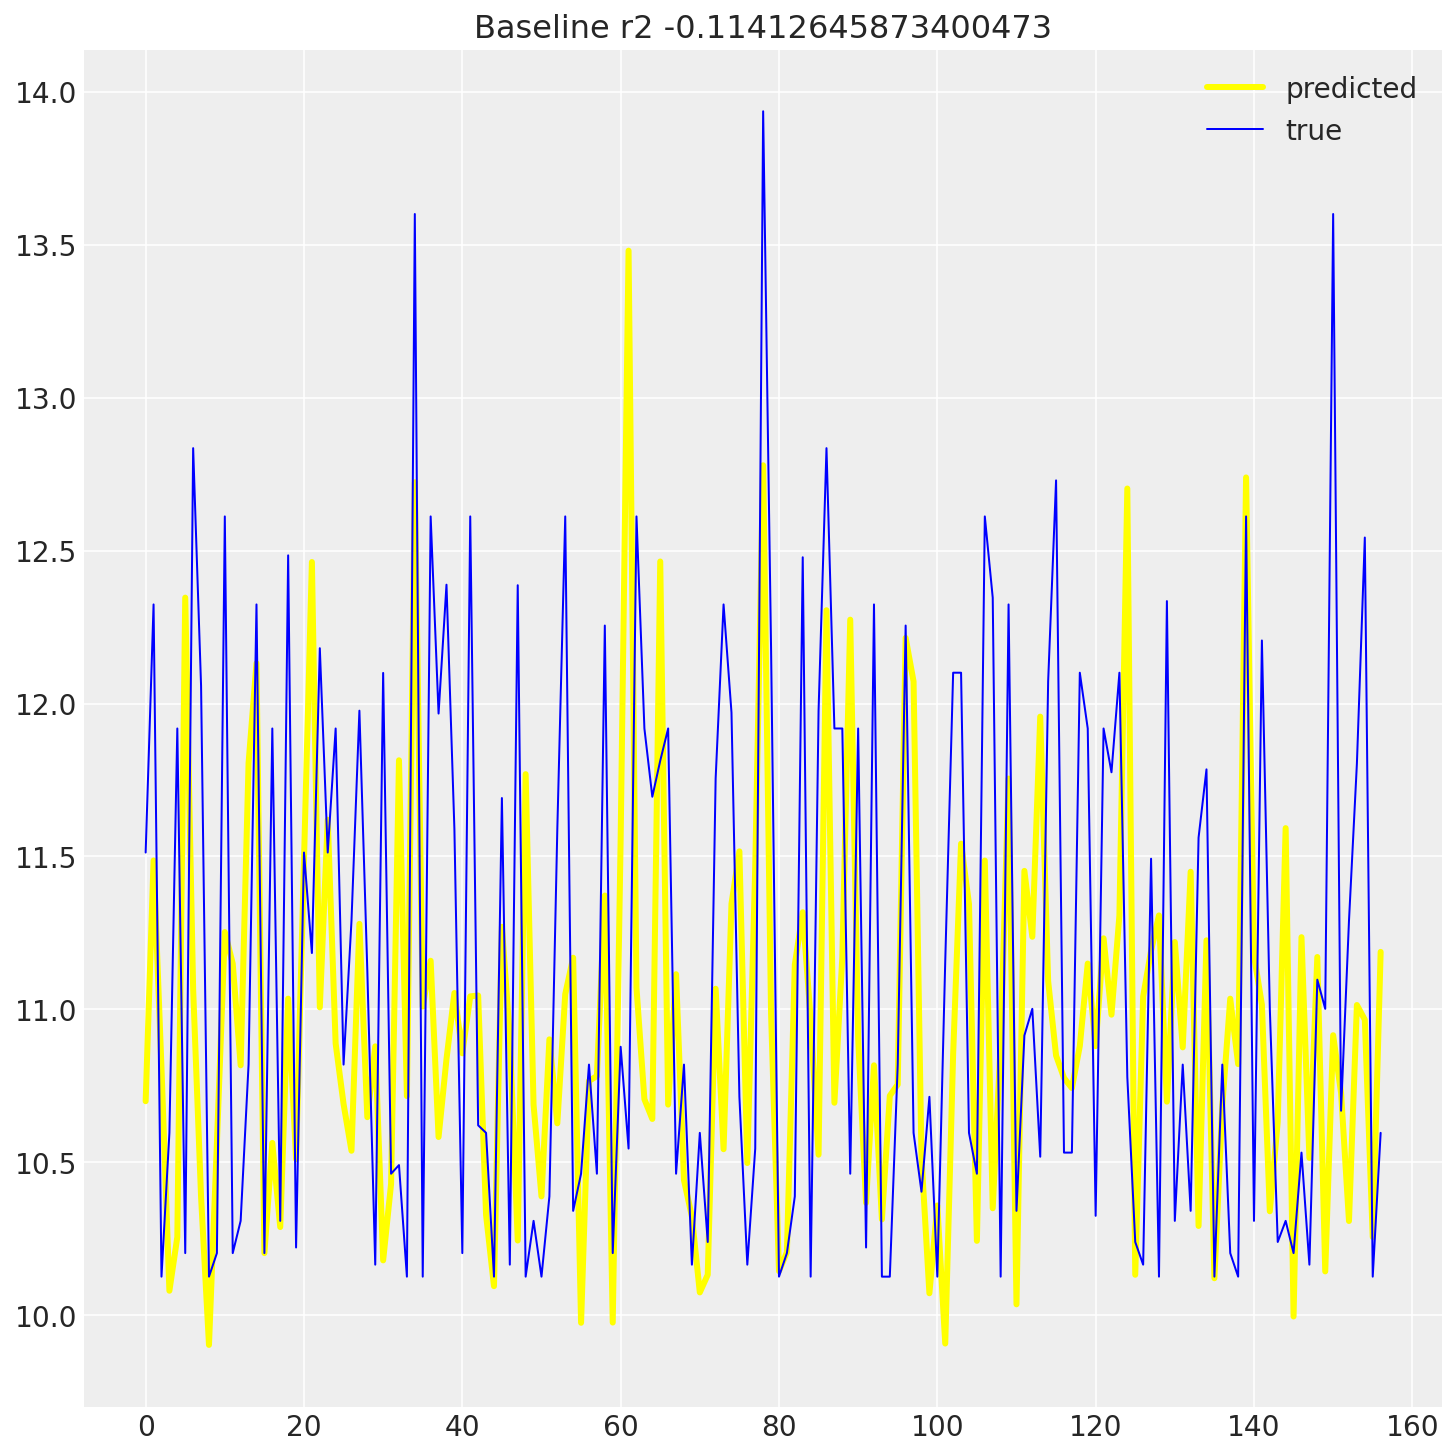

In [37]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from math import sqrt
yhat = model.predict(X_test)

ny_test=np.array(y_test)

rmse = sqrt(mean_squared_error(y_test, yhat))

r2=r2_score(y_test, yhat)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(10,10))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")
plt.title(f"Baseline r2 {r2}")
plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()

### NN with configurable quantile loss function

In [39]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [38]:
def priceModel():
    model = Sequential()
    model.add(Dense(units=1024, input_dim=9,activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(1))
    
    return model

In [40]:
qs = [ 0.01, 0.9, 0.95, 0.99, 1.0] # setup here the percentiles you want to use for Prediction
#colors =["red","green"]
outs={}
ny_test=np.array(y_test)
outs['true']=ny_test
#plt.figure(figsize=(12,12))
#plt.plot(ny_test, color='blue',linewidth=1, label="true")

#for q, color in zip(qs, colors):
for q in qs:
    model = priceModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adam')
    model.fit(X_train.values, y_train.values, validation_split=0.15, epochs=2000, batch_size=64, verbose=0)
    
    # Predict the quantile
    outs[str(q)] = model.predict(X_test)
    #plt.plot(yhat,linewidth=1, label=q, color=color) # plot out this quantile
    print(f"Quantile {q}")

# plt.legend()    
# plt.show()

Quantile 0.01
Quantile 0.9
Quantile 0.95
Quantile 0.99
Quantile 1.0


In [41]:
outs.keys()

dict_keys(['true', '0.01', '0.9', '0.95', '0.99', '1.0'])

In [42]:
X=np.linspace(0,len( outs["0.01"]),len(outs["0.01"]))

In [44]:
l005=[]
for ele in outs["0.01"]:
  l005.append(ele[0])
l090=[]
for ele in outs["0.9"]:
  l090.append(ele[0])
l095=[]
for ele in outs["0.95"]:
  l095.append(ele[0])
l099=[]
for ele in outs["0.99"]:
  l099.append(ele[0])
l100=[]
for ele in outs["1.0"]:
  l100.append(ele[0])

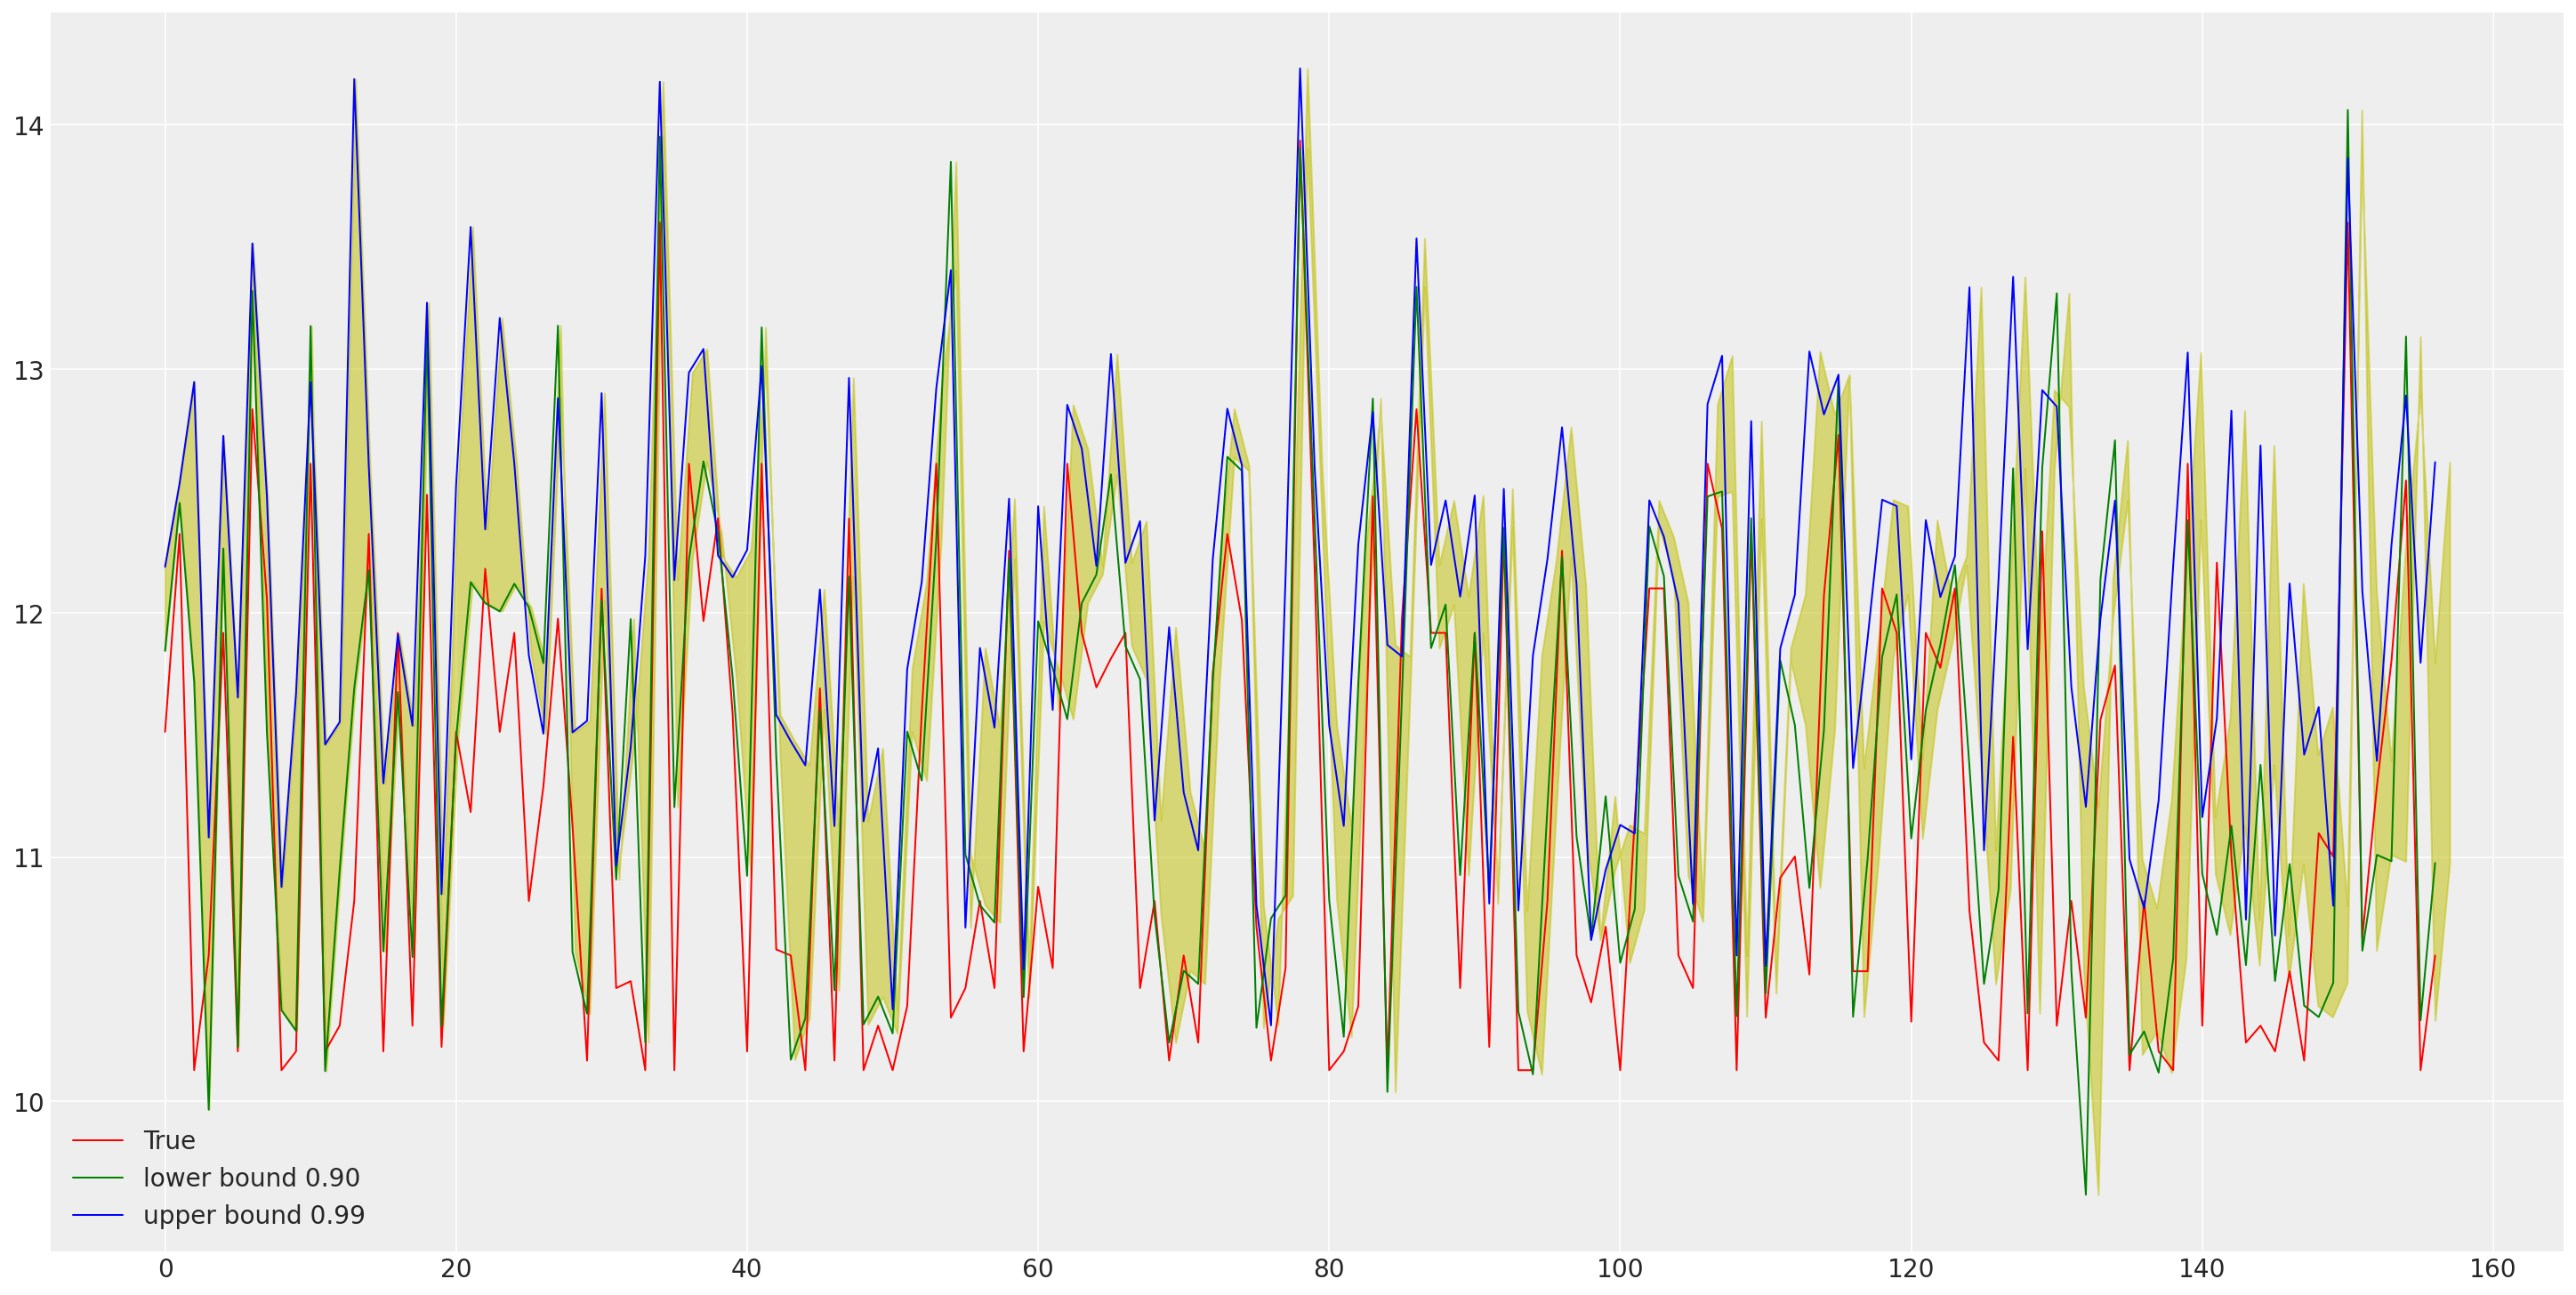

In [45]:
# plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(outs["true"],linewidth=1,color="red", label="True")
plt.plot(outs["0.9"],linewidth=1,color="green", label="lower bound 0.90")
plt.plot(outs["0.99"],linewidth=1,color="blue", label="upper bound 0.99")
plt.fill_between( X,l090, l099,color='y',alpha=.5)

plt.legend()
plt.show()

In [46]:
import copy

In [47]:
outcopy=copy.deepcopy(outs)

In [48]:
for key in outs.keys():
  new_list=[]
  for ele in outs[key]:
    new_list.append(np.exp(ele))
  outs[key]=new_list


In [49]:
l005=[]
for ele in outs["0.01"]:
  l005.append(ele[0])
l090=[]
for ele in outs["0.9"]:
  l090.append(ele[0])
l095=[]
for ele in outs["0.95"]:
  l095.append(ele[0])
l099=[]
for ele in outs["0.99"]:
  l099.append(ele[0])
l100=[]
for ele in outs["1.0"]:
  l100.append(ele[0])

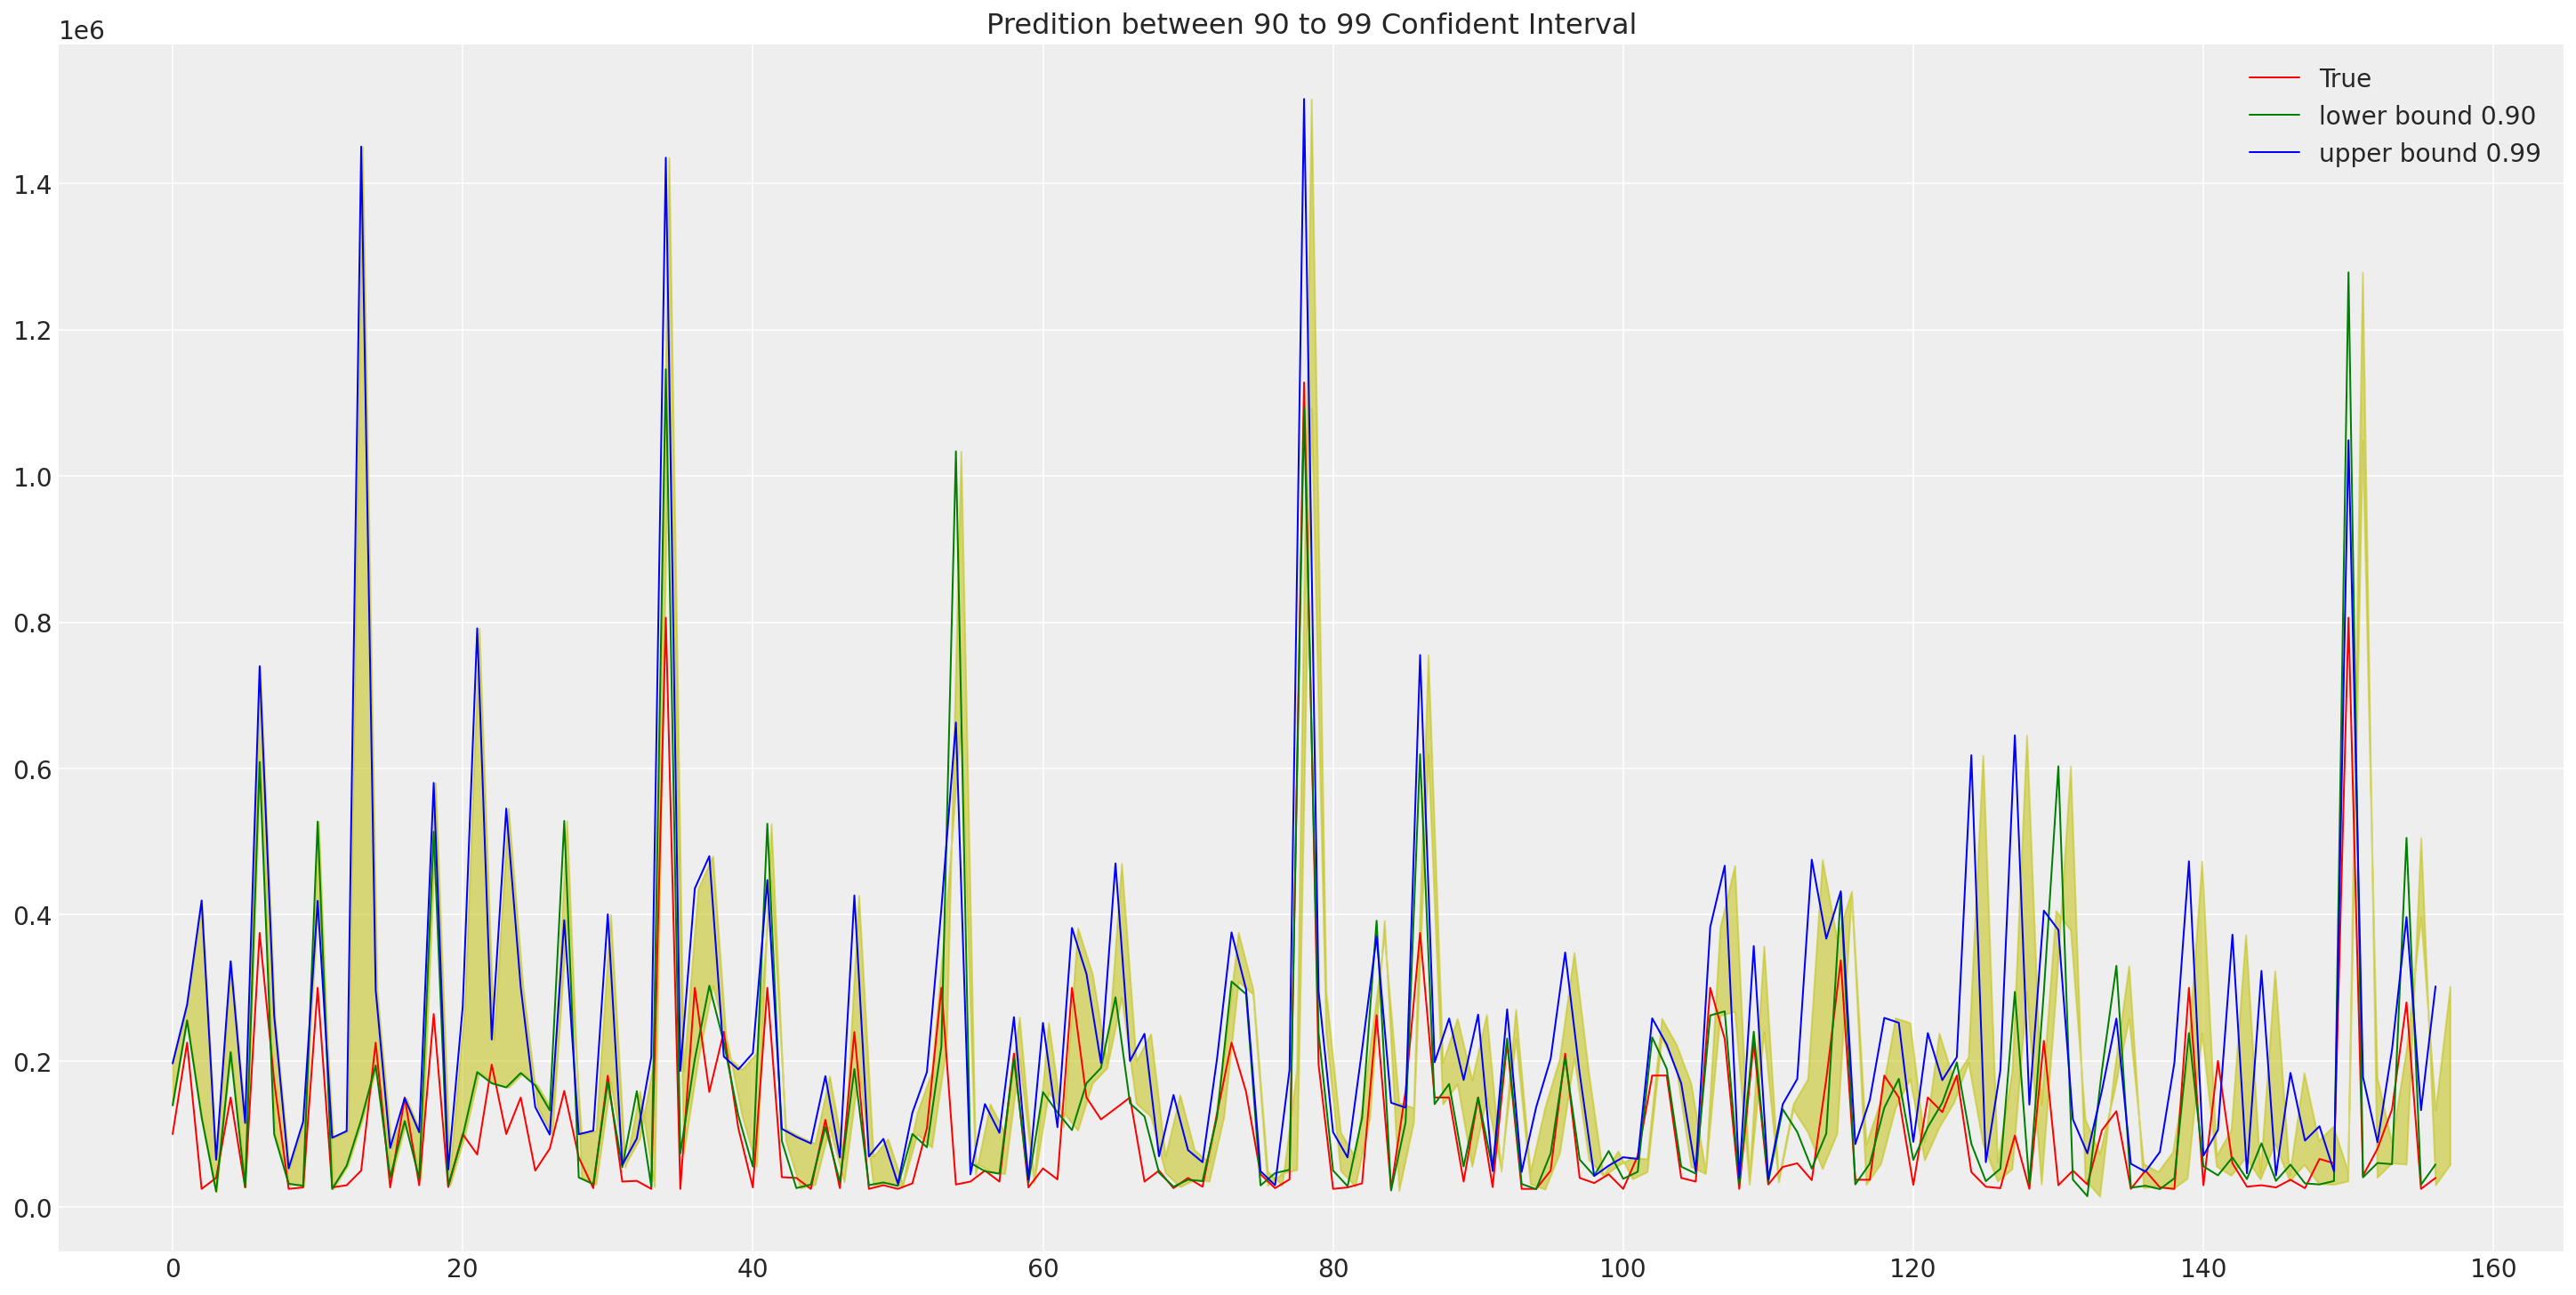

In [51]:
# plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(outs["true"],linewidth=1,color="red", label="True")
plt.plot(outs["0.9"],linewidth=1,color="green", label="lower bound 0.90")
plt.plot(outs["0.99"],linewidth=1,color="blue", label="upper bound 0.99")
#plt.plot(outs["1.0"],linewidth=1,color="orange", label="upper bound 1")
plt.fill_between( X,l090, l099,color='y',alpha=.5)
plt.title("Predition between 90 to 99 Confident Interval")
plt.legend()
plt.show()

In [ ]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    r2 = r2_score(true,predictions)
    
    return mae, rmse, r2

In [ ]:
# Naive baseline is the median
median_pred = X_train['main_price'].mean()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['main_price']

# Display the naive baseline metrics
mb_mae, mb_rmse,r2_baseline = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))
print('Median Baseline R2: {:.4f}'.format(r2_baseline))

Median Baseline  MAE: 0.6323
Median Baseline RMSE: 1.0365
Median Baseline R2: -0.0038


In [ ]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='main_price')
    X_test = X_test.drop(columns='main_price')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = r2_score(y_test,predictions)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,r2]
    
    # Median Value Baseline Metrics
    baseline = np.mean(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_r2 = r2_baseline
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2]
    
    return results

In [ ]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,r2
Linear Regression,0.463761,0.640817,0.567166
ElasticNet Regression,0.813527,0.928581,0.0911488
Random Forest,0.33716,0.551518,0.679394
Extra Trees,0.282447,0.510567,0.725237
SVM,0.33588,0.510534,0.725272
Gradient Boosted,0.421344,0.60691,0.611759
Baseline,0.863382,0.978066,-0.00375792


In [ ]:
!pip install xgboost

In [ ]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# # load the dataset
# X= df_reduced_smogn.drop('main_price',axis=1)
# y=np.log(labels)
# # define model
# model = XGBRegressor()
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = absolute(scores)
# #print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) 

In [ ]:
model = XGBRegressor(max_depth=5, learning_rate=0.2, n_estimators=5000, verbosity=1,objective='reg:squarederror')

In [ ]:
#model = XGBRegressor(verbosity=1,objective='reg:squarederror')

In [ ]:
model.fit(X_train.drop(columns='main_price'),  y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
yhat = model.predict(X_test.drop(columns='main_price'))

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn import metrics
import numpy as np
metrics.r2_score(y_test, yhat)

0.7232910986810661

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11686 sha256=7d03c5ad8c237db37578f8b69a037f9e3714d17f4c70ca4358f8bd6cc306f096
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

In [ ]:
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized, np.log(labels),
                                                   
                                                    test_size = 0.25,
                                                    random_state=12)
print(X_train.shape)
print(X_test.shape)

(1172, 31)
(391, 31)


In [ ]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
    # for max_depth in range(9,20)
    # for min_child_weight in range(5,8)
    # eta in [.3, .2, .1, .05, .01, .005]:

In [ ]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,n_estimators,eta,min_child_weight):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'learning_rate' : learning_rate,
              'n_estimators' : int(n_estimators),
              'eta':eta,
              'gamma': gamma,
              'min_child_weight':int(min_child_weight),
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=999, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [ ]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 20), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                             'learning_rate' : (0.01,0.3),
                                             'n_estimators': (50,500),
                                             'eta':(.005,.5),
                                             'min_child_weight': (2,8)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=500, acq='ucb')

|   iter    |  target   | colsam... |    eta    |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.07078  |  0.7642   |  0.4418   |  0.5839   |  0.1251   |  4.319    |  4.81     |  199.9    |
|  2        | -0.04249  |  0.82     |  0.3411   |  0.04547  |  0.07688  |  18.21    |  3.06     |  488.1    |
|  3        | -0.1548   |  0.437    |  0.3899   |  0.8512   |  0.1983   |  16.14    |  3.497    |  84.16    |
|  4        | -0.1432   |  0.4585   |  0.4976   |  0.8013   |  0.2918   |  15.85    |  7.693    |  241.2    |
|  5        | -0.1815   |  0.3993   |  0.3835   |  0.2027   |  0.2367   |  19.47    |  2.268    |  295.6    |
|  6        | -0.1421   |  0.3124   |  0.02236  |  0.4767   |  0.105    |  17.24    |  5.883    |  477.9    |
|  7        | -0.08032  |  0.8276   |  0.3891   |  0.7583   |  0.1359   |  18.01    |  7.498    |  431.2    |
|  8      

In [ ]:
print(xgb_bo.max)

In [ ]:
 xgb_bo.max['params']

In [ ]:
params =  xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

In [ ]:
params

In [ ]:
num_boost_round =999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)
r2_score(best_model.predict(dtest), y_test)

In [ ]:
yhat = best_model.predict(dtest)

rmse = sqrt(mean_squared_error(yhat, y_test))

r2_score(yhat, y_test)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(12,12))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")

plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()


In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'min_child_weight': 1,

    # Other parameters

}

In [ ]:
params['eval_metric'] = "rmse"
num_boost_round = 999

In [ ]:
min_rmse = float("Inf")
best_params = None
for lr in [.3, .2, .1, .05, .01, .005,.02,.08]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['learning_rate'] = lr
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_rmse = cv_results['train-rmse-mean'].min()
    boost_rounds = cv_results['train-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = lr
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

In [ ]:
params['learning_rate'] = .2

In [ ]:
min_rmse = float("Inf")
best_params = None
for estimators in [100, 200, 400, 500, 1000, 2000,5000]:
    print("CV with estimators={}".format(estimators))
    # We update our parameters
    params['n_estimators'] = estimators
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_rmse = cv_results['train-rmse-mean'].min()
    boost_rounds = cv_results['train-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = estimators
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

In [ ]:
params['n_estimators']=100
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,20)
    for min_child_weight in range(5,8)
]
# Define initial best params and MAE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_rmse = cv_results['train-rmse-mean'].min()
    boost_rounds = cv_results['train-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [ ]:
params['max_depth'] = 14
params['min_child_weight'] = 5

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['train-rmse-mean'].min()
    boost_rounds = cv_results['train-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))


In [ ]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [ ]:

min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_rmse = cv_results['train-rmse-mean'].min()
    boost_rounds = cv_results['train-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

In [ ]:
params['eta'] = .03

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)
r2_score(best_model.predict(dtest), y_test)

In [ ]:
ny_test=np.array(y_test)

rmse = sqrt(mean_squared_error(y_test, yhat))

r2=r2_score(y_test, yhat)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(12,12))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")

plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()
